2.0.0
                                       current_state  action    reward  \
0  [0.21566772 0.45237356 0.7150583  0.08250281 0...       6 -0.129140   
1  [0.21580505 0.44817883 0.71329355 0.23458141 0...       1 -0.139165   
2  [0.21716309 0.44534412 0.71176654 0.41268122 0...       3 -0.145940   
3  [0.21716309 0.43917203 0.7110627  0.60430264 0...       0 -0.160691   
4  [0.21716309 0.43348736 0.7101828  0.77778906 0...       0 -0.174278   

                                          next_state  total_reward   done  \
0  [0.21566772 0.45237356 0.7150583  0.08250281 0...     -0.129140  False   
1  [0.21580505 0.44817883 0.71329355 0.23458141 0...     -0.268305  False   
2  [0.21716309 0.44534412 0.71176654 0.41268122 0...     -0.414245  False   
3  [0.21716309 0.43917203 0.7110627  0.60430264 0...     -0.574936  False   
4  [0.21716309 0.43348736 0.7101828  0.77778906 0...     -0.749214  False   

   policy_type  episode  
0            0        0  
1            0        0  
2       

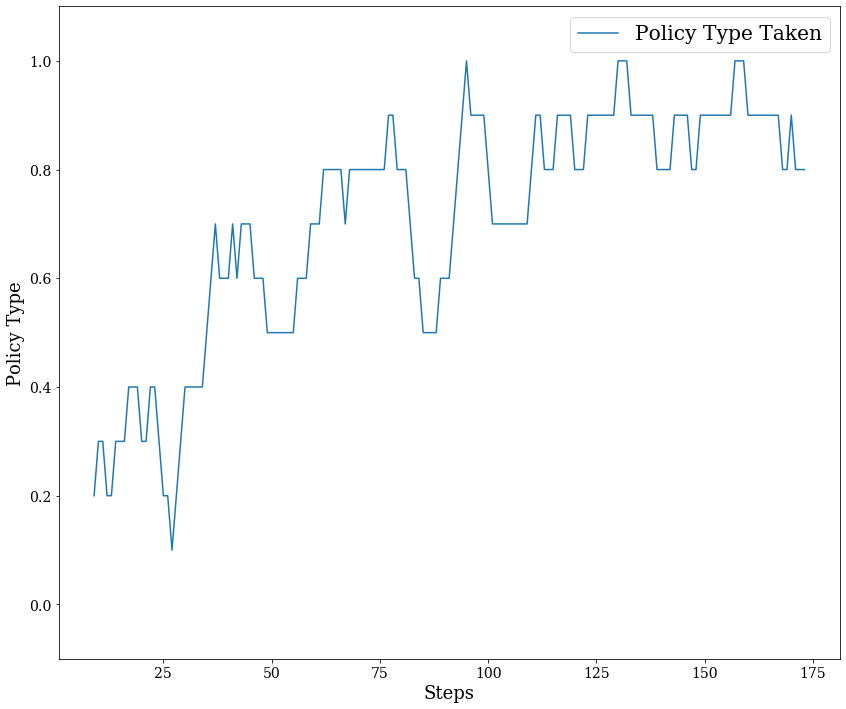

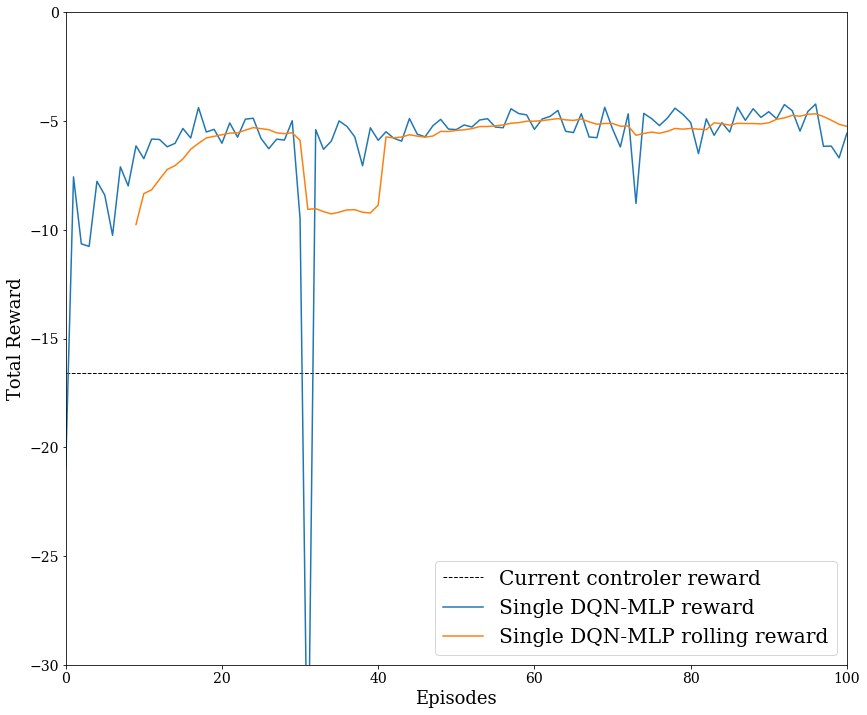

In [45]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14

## Using DataAnalysis notbook
step100_mean = -17.65001875
step100_std  = 1.553729686751266
##
step100_mean = -16.5585471875
step100_std =  6.60839952001191

## READ data 
import pandas as pd
import numpy as np
import math, sys
dir_name = '../drivers/'#/results_dqn_ensemble_v2/'
#dir_name = '../drivers/results_dqn_ensemble_v2/'
#dir_name = '../drivers/results_dqn_ensemble_v1/'
#filename1 = dir_name+'data_accelerator_lstm_episode10000_steps50_batched_memories_0602420_v1.log'
filename1 = dir_name+'/2_data_accelerator_lstm_episode5000_steps45_batched_memories_09022020_v1.log'#2_data_accelerator_lstm_episode5000_steps100_batched_memories_0602420_v1.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes5000_steps100_09052020b_batched_memories.log'
#filename1 = dir_name+'fnal_surrogate_dqn_ensemble2_mlp_episodes500_steps100_09092020b_batched_memories.log'
#filename1 = dir_name+'fnal_surrogate_dqn_ensemble1_mlp_episodes500_steps100_09092020b_batched_memories.log'
frame = pd.read_csv(filename1, sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done','policy_type','episode'])

print(frame.head())

##
frame = frame[frame.done==True] 
frame = frame.reset_index()

## rolling averages ##
rolling_setting = 10
frame['policy_type_roll'] = frame['policy_type'].rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'].rolling(rolling_setting).mean()


## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()

## Print total reward ##
#frame_done = frame[frame.done==True] 
#frame_done = frame_done.reset_index()
#print(frame_done.total_reward_roll)
#frame_done.total_reward.plot()
fig,ax = plt.subplots(1, 1,figsize=(14,12))
#ax.fill_between(frame['episode'], step100_mean-2*step100_std, step100_mean+2*step100_std, label='2 sigma range', color='green', alpha=0.75)
#ax.fill_between(frame['episode'], step100_mean-step100_std, step100_mean+step100_std,label='1 sigma range', color='yellow', alpha=0.75)
plt.axhline(y=step100_mean, lw=1,ls='--',color='black', linestyle='-', label='Current controler reward')
plt.plot(frame['total_reward'],label='Single DQN-MLP reward')
plt.plot(frame['total_reward_roll'],label='Single DQN-MLP rolling reward')
frame['total_reward_diff'] = frame['total_reward_roll']-frame['total_reward']
#ax.fill_between(frame['episode'], frame['total_reward_roll']-abs(frame['total_reward_diff']), 
#                frame['total_reward_roll']+abs(frame['total_reward_diff']),
#                label='1 sigma range', color='red', alpha=0.75)
#ax.set_xlabel('Steps')
#ax.set_ylabel('Policy Type')
plt.xlim(0,100)
plt.ylim(-30,0)
plt.legend(fontsize='x-large')
#fig,ax = plt.subplots(1, 1,figsize=(14,12))
#plt.plot(frame.total_reward_roll, label='Total Reward')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
plt.show()